### Autoencoder Implementation

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [14]:
transform = transforms.ToTensor()

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5),(0.5))
# ])

mnist_data = datasets.MNIST(root="../dataset",train=True,download=True,transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)

In [15]:
dataiter = iter(data_loader)
images,labels = next(dataiter)
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [17]:
#Autoencoder Linear
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128), #N*784 -> N*128
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3), # -> N*3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3,12), #N*3 -> N*784
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28), 
            nn.Sigmoid() # -> N*784
        )
        
    
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [28]:
#Autoencoder CNN
class AutoencoderCNN(nn.Module):
    def __init__(self):
        #N,1,28,28
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=2,padding=1), #N,16,14,14
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=2,padding=1), #N,32,7,7
            nn.ReLU(),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=7) #N,64,1,1
        )
        
        #N,64,1,1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,7), # N,32,7,7
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1), #N,16,13,13
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1), #N,1,28,28
            nn.Sigmoid()
        )
        
    
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
#Linear AE Model
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [ ]:
#Training Loop for Linear AE
epochs = 4
outputs = []

for epoch in range(epochs):
    for img,_ in data_loader:
        img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon,img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item():4f}')
    outputs.append((epoch,img,recon))

Epoch: 1, Loss: 0.043307
Epoch: 2, Loss: 0.038707
Epoch: 3, Loss: 0.034140
Epoch: 4, Loss: 0.029807


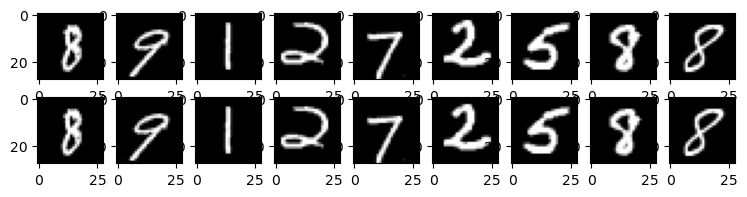

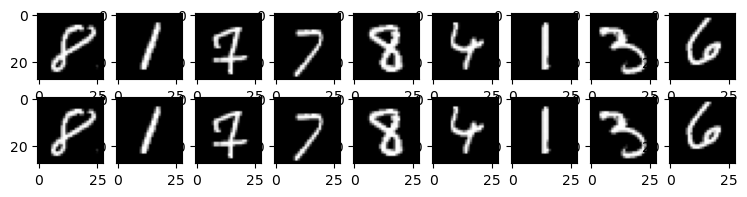

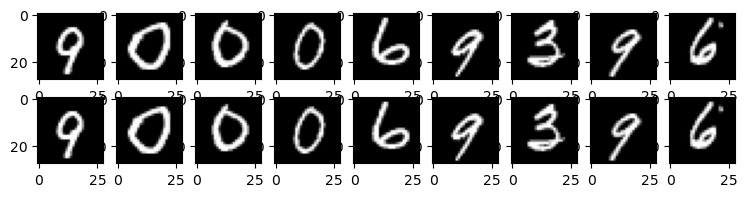

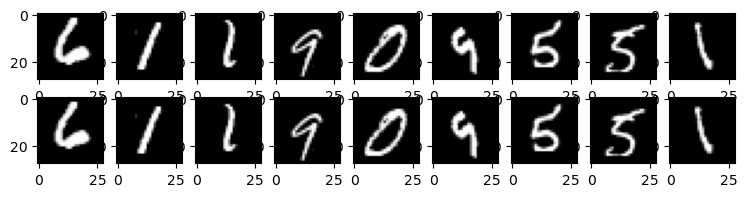

In [25]:
#For Linear AE
for k in range(0,epochs):
    plt.figure(figsize=(9,2))
    plt.gray()
    
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][1].detach().numpy()
    
    for i,item in enumerate(imgs):
        if i>=9: break;
        plt.subplot(2,9,i+1)
        item = item.reshape(-1,28,28)
        
        plt.imshow(item[0])
        
    for i,item in enumerate(recon):
        if i>=9: break;
        plt.subplot(2,9,9+i+1)
        item = item.reshape(-1,28,28)
        
        plt.imshow(item[0])

In [29]:
#Convolutional AE Model
model = AutoencoderCNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [30]:
#Training Loop for Convolutional AE
epochs = 4
outputs = []

for epoch in range(epochs):
    for img,_ in data_loader:
        recon = model(img)
        loss = criterion(recon,img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item():4f}')
    outputs.append((epoch,img,recon))

Epoch: 1, Loss: 0.009204
Epoch: 2, Loss: 0.004955
Epoch: 3, Loss: 0.004108
Epoch: 4, Loss: 0.003728


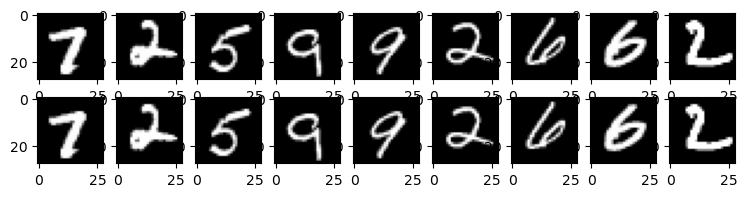

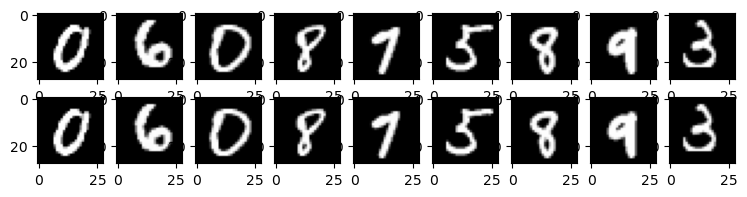

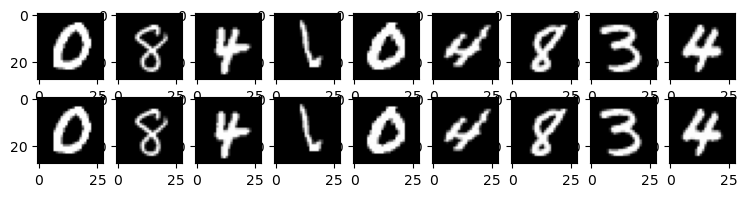

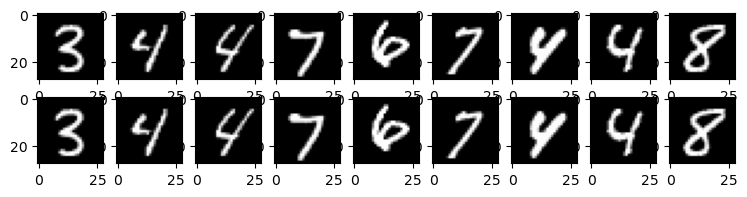

In [31]:
# For Convolutional AE
for k in range(0,epochs):
    plt.figure(figsize=(9,2))
    plt.gray()
    
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][1].detach().numpy()
    
    for i,item in enumerate(imgs):
        if i>=9: break;
        plt.subplot(2,9,i+1)
        
        plt.imshow(item[0])
        
    for i,item in enumerate(recon):
        if i>=9: break;
        plt.subplot(2,9,9+i+1)
        
        plt.imshow(item[0])